# EDA & Feature Engineering

## Imports

In [810]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from typing import Callable
from pandas import DataFrame, Series


sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")

warnings.filterwarnings('ignore')

## Data Overview

In [811]:
URL = "url"
CATEGORY = "category"
STATE = "state"
PRICE = "price"
LIVING_SPACE = "living_space"
ROOMS = "rooms"
ROOMS_OE = "rooms_ordinal_encoded"
PUBLISHER = "publisher"
RATING_LOCATION = "rating_location"
RATING_PUBLIC_TRANSPORT = "rating_public_transport"
HOUSE_CATEGORY = "house_category"
HOUSE_YEAR = "house_build_year"
HOUSING_SITUATION = "housing_situation"
IS_BALCONY = "is_balcony"
IS_BATH = "is_bath"
PARKING = "parking_space"
IS_ELEVATOR = "is_elevator"
IS_GUEST_WC = "is_guest_wc"
IS_GARDEN = "is_garden"
IS_TERRACE = "is_terrace"
IS_WINTER_GARDEN = "is_wintergarden"
IS_BATH_WITH_WINDOW = "is_bath_with_window"
IS_NEED_RENOVATION = "is_need_renovation"
IS_NEW_BUILDING = "is_new_building"
ENERGY_HEATING_TYPE = "energy_heating_type"
ENERGY_SOURCE = "energy_source"
ENERGY_CERTIFICATE_TYPE = "energy_certificate_type"
ENERGY_BUILDING_TYPE = "energy_building_type"
ENERGY_ESSENTIAL_TYPE = "energy_essential_type"
ENERGY_EFFICIENT_CLASS = "energy_efficient_class"

In [812]:
df = pd.read_csv("./data/cleaned_property_data.csv", sep="|").drop_duplicates()
df.head()

,url,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
0,https://www.immowelt.de/expose/28xsk53,Apartment,bl-baden-wuerttemberg,320000.0,87.00,3.5,Public publisher,Gut,Okay,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,h
1,https://www.immowelt.de/expose/27egy5v,Apartment,bl-baden-wuerttemberg,449500.0,79.00,2.5,Public publisher,Gut,Super,Not given,...,False,False,False,True,True,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,NaN
2,https://www.immowelt.de/expose/27dc45u,Apartment,bl-baden-wuerttemberg,465000.0,53.99,2.0,Public publisher,Gut,Gut,terrassenwohnung,...,False,True,False,False,False,True,tiefgarage,gas,NaN,NaN
3,https://www.immowelt.de/expose/28b5m5a,Apartment,bl-baden-wuerttemberg,179000.0,58.35,2.0,Public publisher,Gut,Gut,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,NaN
4,https://www.immowelt.de/expose/2zpe54x,Apartment,bl-baden-wuerttemberg,385000.0,NaN,4.0,Public publisher,Okay,Okay,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,other,NaN,NaN


In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 620
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      594 non-null    object 
 1   category                 594 non-null    object 
 2   state                    594 non-null    object 
 3   price                    594 non-null    float64
 4   living_space             592 non-null    float64
 5   rooms                    594 non-null    float64
 6   publisher                594 non-null    object 
 7   rating_location          594 non-null    object 
 8   rating_public_transport  594 non-null    object 
 9   house_category           595 non-null    object 
 10  housing_situation        595 non-null    object 
 11  house_build_year         262 non-null    float64
 12  is_balcony               594 non-null    object 
 13  is_bath                  594 non-null    object 
 14  is_elevator              5

In [814]:
df.describe()

,price,living_space,rooms,house_build_year
count,5.940000e+02,592.000000,594.000000,262.000000
mean,5.381570e+05,128.544414,4.629630,1961.683206
std,8.158131e+05,93.985204,4.246319,55.135733
min,2.990000e+04,2.173000,1.000000,1579.000000
25%,1.990000e+05,71.000000,3.000000,1935.250000
50%,3.600000e+05,109.000000,4.000000,1970.500000
75%,5.880000e+05,150.000000,5.000000,1999.000000
max,1.090000e+07,844.000000,60.000000,2024.000000


In [815]:
df.describe(include=["O"]).T

,count,unique,top,freq
url,594,594,https://www.immowelt.de/expose/28xsk53,1
category,594,2,Apartment,318
state,594,16,bl-berlin,40
publisher,594,2,Public publisher,561
rating_location,594,5,Gut,285
rating_public_transport,594,5,Gut,163
house_category,595,15,Not given,272
housing_situation,595,3,Other,491
is_balcony,594,2,False,383
is_bath,594,2,False,356


In [816]:
to_float_cols = [
    IS_BALCONY,
    IS_BATH,
    IS_ELEVATOR,
    IS_GUEST_WC,
    IS_GARDEN,
    IS_TERRACE,
    IS_WINTER_GARDEN,
    IS_BATH_WITH_WINDOW,
    IS_NEED_RENOVATION,
    IS_NEW_BUILDING,
]

for col in to_float_cols:
    df[col] = df[col].astype(bool)

df.describe(include=["O"]).T

,count,unique,top,freq
url,594,594,https://www.immowelt.de/expose/28xsk53,1
category,594,2,Apartment,318
state,594,16,bl-berlin,40
publisher,594,2,Public publisher,561
rating_location,594,5,Gut,285
rating_public_transport,594,5,Gut,163
house_category,595,15,Not given,272
housing_situation,595,3,Other,491
parking_space,595,8,Keine Parkmöglichkeit,490
energy_source,595,4,gas,304


In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 620
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      594 non-null    object 
 1   category                 594 non-null    object 
 2   state                    594 non-null    object 
 3   price                    594 non-null    float64
 4   living_space             592 non-null    float64
 5   rooms                    594 non-null    float64
 6   publisher                594 non-null    object 
 7   rating_location          594 non-null    object 
 8   rating_public_transport  594 non-null    object 
 9   house_category           595 non-null    object 
 10  housing_situation        595 non-null    object 
 11  house_build_year         262 non-null    float64
 12  is_balcony               595 non-null    bool   
 13  is_bath                  595 non-null    bool   
 14  is_elevator              5

## Helper Functions

In [818]:
MEAN = np.mean
MEDIAN = np.median

def plot_target_relation(x: str, title: str, aggfunc: Callable = np.mean, rotate: float = 0.0):
    ax = sns.pointplot(x=x, y=PRICE, data=df, estimator=aggfunc)
    ax.set(title=title);
    ax.tick_params(axis='x', rotation=rotate)
    return df.pivot_table(index=x, values=PRICE, aggfunc=aggfunc)

def describe_histplot(x: str, title: str):
    sns.histplot(x=x, data=df).set(title=title)
    print(f"Skew:\t{df[x].skew()}")
    print(f"median:\t{df[x].median()}")
    return df[x].describe()

def countplot_rotate(x: str, rotate: float = 0):
    # TODO: Add title!
    ax = sns.countplot(x=x, data=df)
    ax.set(title=f"Distribution of {x} records")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = rotate)

def plot_true_false_feature_report(feature: str):
    # TODO: implement
    pass


## Target

Skew:	6.998055479058362
median:	360000.0


count    5.940000e+02
mean     5.381570e+05
std      8.158131e+05
min      2.990000e+04
25%      1.990000e+05
50%      3.600000e+05
75%      5.880000e+05
max      1.090000e+07
Name: price, dtype: float64

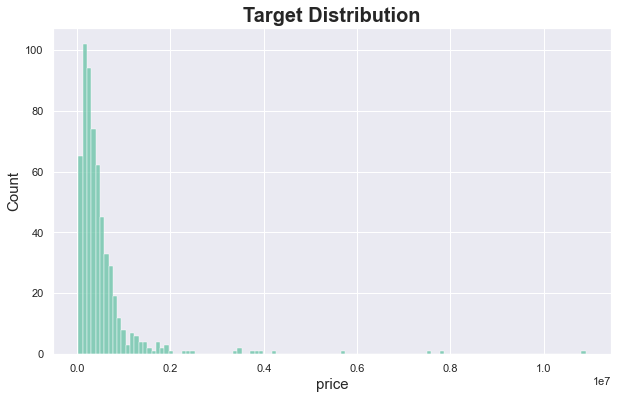

In [819]:
describe_histplot(x=PRICE, title="Target Distribution")

## Category

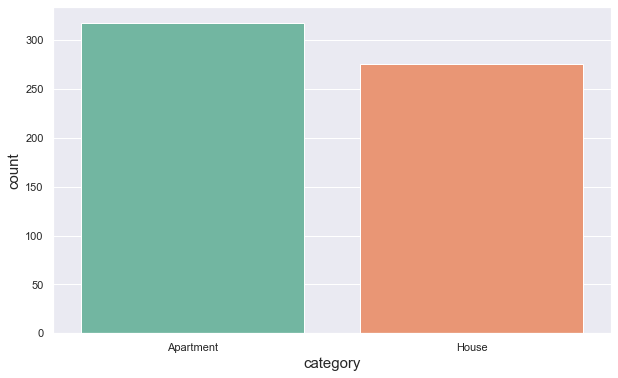

In [820]:
sns.countplot(x=CATEGORY, data=df);

In [821]:
df[CATEGORY]

0      Apartment
1      Apartment
2      Apartment
3      Apartment
4      Apartment
         ...    
616        House
617        House
618        House
619        House
620        House
Name: category, Length: 595, dtype: object

,price
category,
Apartment,368180.155660
House,733999.985507


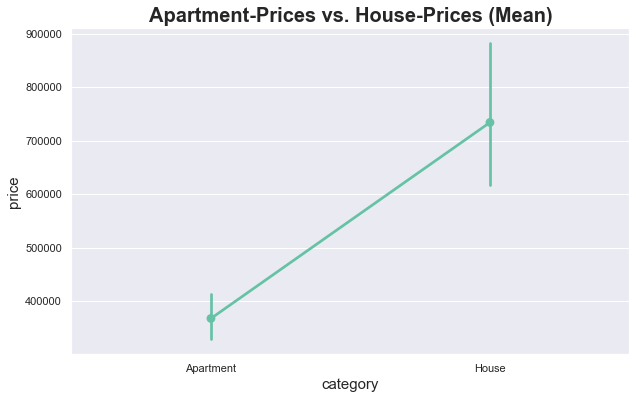

In [822]:
plot_target_relation(x=CATEGORY, title="Apartment-Prices vs. House-Prices (Mean)", aggfunc=MEAN)

,price
category,
Apartment,259750.0
House,472000.0


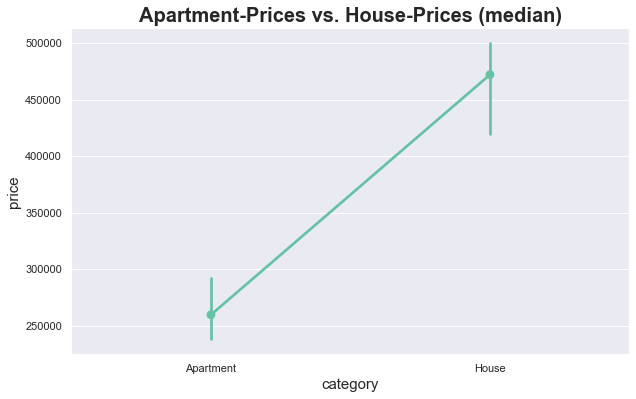

In [823]:
plot_target_relation(x=CATEGORY, title="Apartment-Prices vs. House-Prices (median)", aggfunc=MEDIAN)

- => Category has a strong impact on the target
- => OneHotEncoding

## State

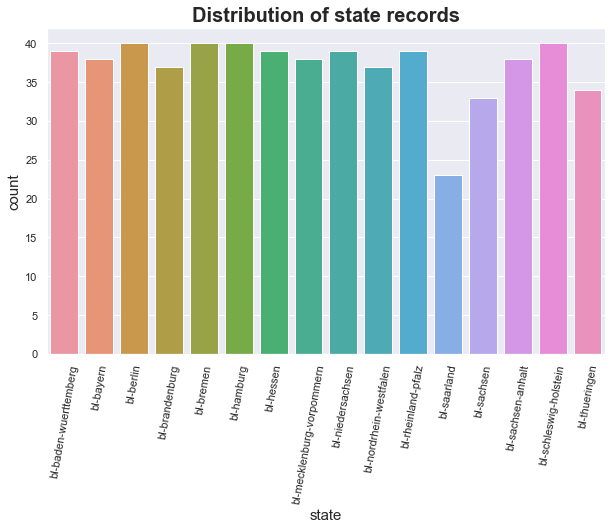

In [824]:
countplot_rotate(x=STATE, rotate=80)

,price
state,
bl-baden-wuerttemberg,5.216046e+05
bl-bayern,6.528350e+05
bl-berlin,1.213122e+06
bl-brandenburg,4.463956e+05
bl-bremen,4.288912e+05
bl-hamburg,1.440186e+06
bl-hessen,5.971667e+05
bl-mecklenburg-vorpommern,4.176571e+05
bl-niedersachsen,3.551974e+05


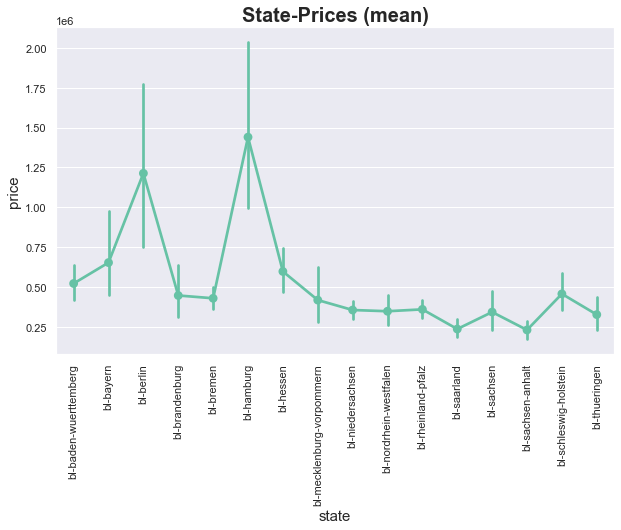

In [825]:
plot_target_relation(x=STATE, title="State-Prices (mean)", aggfunc=MEAN, rotate=90)

- => the state has a significant impact on the target.
- => OneHotEncoding

## Living Space

In [826]:
df[LIVING_SPACE].isna().sum()

3

Skew:	3.0246364706465387
median:	109.0


count    592.000000
mean     128.544414
std       93.985204
min        2.173000
25%       71.000000
50%      109.000000
75%      150.000000
max      844.000000
Name: living_space, dtype: float64

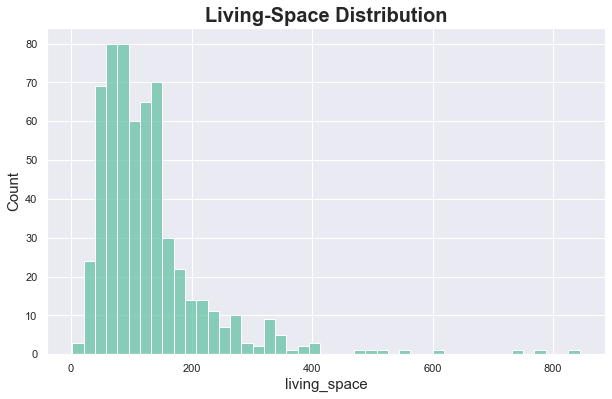

In [827]:
describe_histplot(x=LIVING_SPACE, title="Living-Space Distribution")

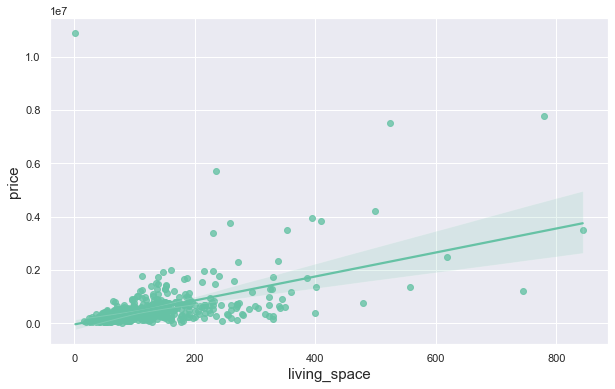

In [828]:
sns.regplot(x=LIVING_SPACE, y=PRICE, data=df);

- => Living-Space has a significant impact on the price
- => High Skew -> Log-transformation
- => Scale

## Rooms

In [829]:
df[ROOMS].isna().sum()

1

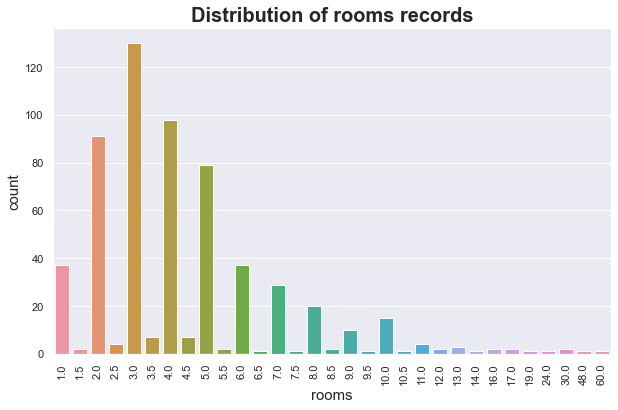

In [830]:
countplot_rotate(x=ROOMS, rotate=90)

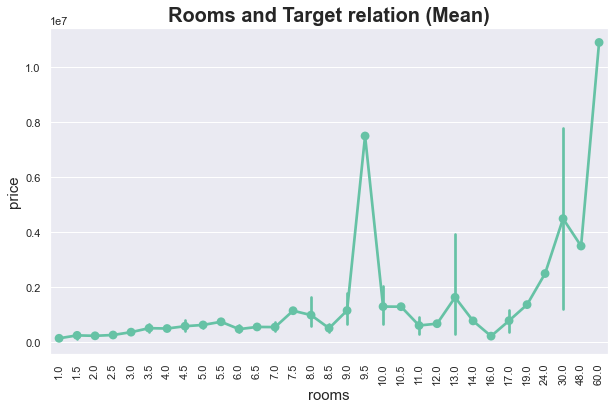

In [831]:
plot_target_relation(x=ROOMS, title="Rooms and Target relation (Mean)", rotate=90);

In [832]:
# TODO: hier tiefer rein
# -> 9.5 und 13.0 raus?
# ab 24 nicht mehr nutzbar?

In [833]:
df[(df[ROOMS] == 9.5) | (df[ROOMS] == 13)]

,url,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
113,https://www.immowelt.de/expose/27a225p,House,bl-berlin,7500000.0,524.46,9.5,Public publisher,Mäßig,Super,villa,...,True,True,False,False,False,True,Keine Parkmöglichkeit,gas,bedarfsausweis,d
222,https://www.immowelt.de/expose/28vqm56,House,bl-hamburg,3950000.0,394.62,13.0,Public publisher,Gut,Super,stadthaus,...,False,True,True,False,False,False,Keine Parkmöglichkeit,gas,bedarfsausweis,d
385,https://www.immowelt.de/expose/28lfh5b,House,bl-nordrhein-westfalen,659000.0,340.00,13.0,Public publisher,Okay,Gut,mehrfamilienhaus,...,False,False,False,True,False,False,Keine Parkmöglichkeit,gas,bedarfsausweis,d
538,https://www.immowelt.de/expose/269v55a,House,bl-sachsen-anhalt,295000.0,330.00,13.0,Private publisher,Gut,Mäßig,mehrfamilienhaus,...,False,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,d


- The 9.5 is an outlier. We remove this
- https://www.immowelt.de/expose/28vqm56 is also an outlier

In [834]:
outlier_filter = (df[ROOMS] != 9.5) & (df[URL] != "https://www.immowelt.de/expose/28vqm56")

shape_before = df.shape[0]
df = df[outlier_filter]
shape_after = df.shape[0]
print(f"Removed: {shape_before - shape_after}")

Removed: 2


In [835]:
df[df[ROOMS] > 25]

,url,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
99,https://www.immowelt.de/expose/28zn659,House,bl-berlin,7790000.0,780.000,30.0,Public publisher,Okay,Super,villa,...,False,False,False,False,False,False,Keine Parkmöglichkeit,other,NaN,NaN
155,https://www.immowelt.de/expose/27yfd5r,House,bl-brandenburg,3500000.0,844.000,48.0,Public publisher,Gut,Super,mehrfamilienhaus,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,NaN,NaN
227,https://www.immowelt.de/expose/27dea5z,House,bl-hamburg,10900000.0,2.173,60.0,Public publisher,Super,Super,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,bedarfsausweis,d
309,https://www.immowelt.de/expose/27n6y5z,House,bl-mecklenburg-vorpommern,1200000.0,745.000,30.0,Public publisher,Gut,Gut,mehrfamilienhaus,...,True,True,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,e


- 227 has a living space of 2.173, but 60 rooms. Thats not possible or very specific => remove this
- all over 25 rooms are to specific and we have not enough data so that the model can handle this
- => remove all over 25 Rooms!

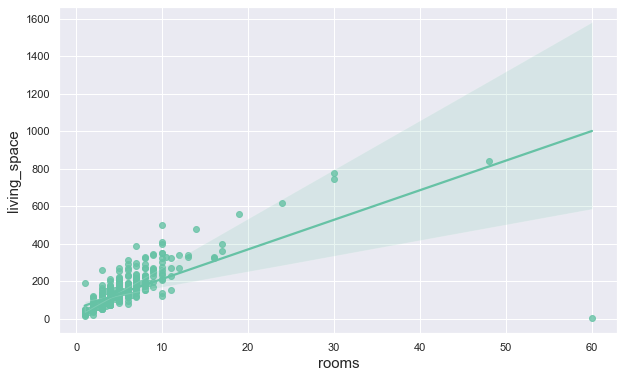

In [836]:
sns.regplot(x=ROOMS, y=LIVING_SPACE, data=df);

In [837]:
df[ROOMS].isna().sum()

1

In [838]:
shape_before = df.shape[0]
df = df[df[ROOMS] <= 25]
shape_after = df.shape[0]
print(f"Removed: {shape_before - shape_after} (incl. nan values)")

Removed: 5 (incl. nan values)


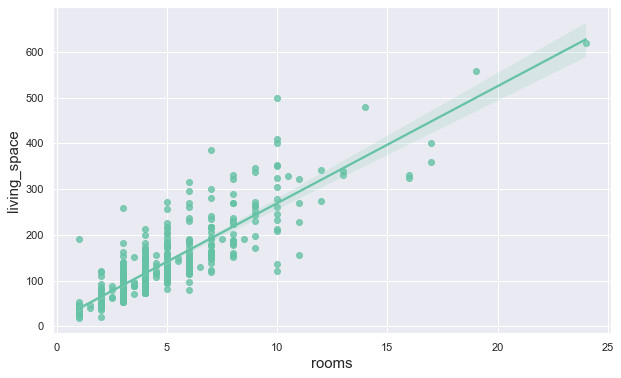

In [839]:
sns.regplot(x=ROOMS, y=LIVING_SPACE, data=df);

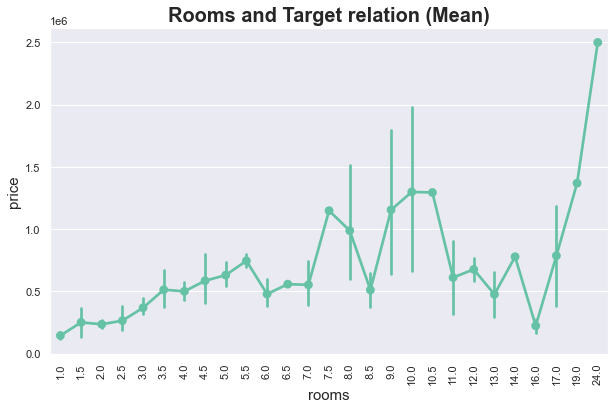

In [840]:
plot_target_relation(x=ROOMS, title="Rooms and Target relation (Mean)", rotate=90);

In [841]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

In [842]:
df[ROOMS_OE] = df[ROOMS].astype(int)

def rooms_to_cluster(rooms: int) -> int:
    """
    0:  1 & 2
    1:  3 & 4
    2:  5 & 6
    3:  7 & 8
    4:  > 8
    returns a ordered cluster number
    """

    if rooms == np.nan: return np.nan
    if rooms < 3: return 0
    elif rooms < 5: return 1
    elif rooms < 7: return 2
    elif rooms < 9: return 3
    return 4

df[ROOMS_OE] = df[ROOMS].apply(rooms_to_cluster).astype("category").cat.reorder_categories([i for i in range(5)])
df[ROOMS_OE].value_counts(dropna=False, sort=False)

0    134
1    242
2    119
3     52
4     41
Name: rooms_ordinal_encoded, dtype: int64

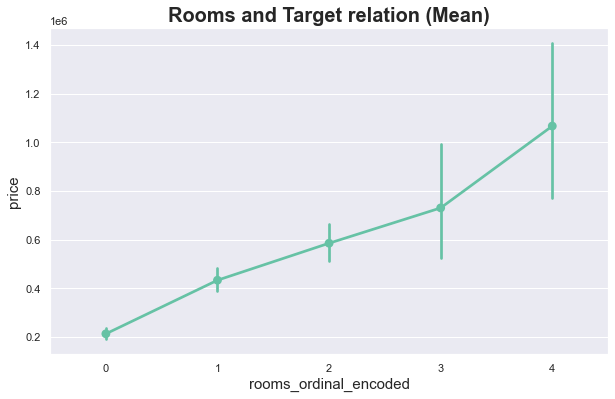

In [843]:
plot_target_relation(x=ROOMS_OE, title="Rooms and Target relation (Mean)");

- => put together .5 and total
- => Classify in useful Clusters
- => OrdinalEncoding of the Clusters

## Publisher

Public publisher     555
Private publisher     33
Name: publisher, dtype: int64

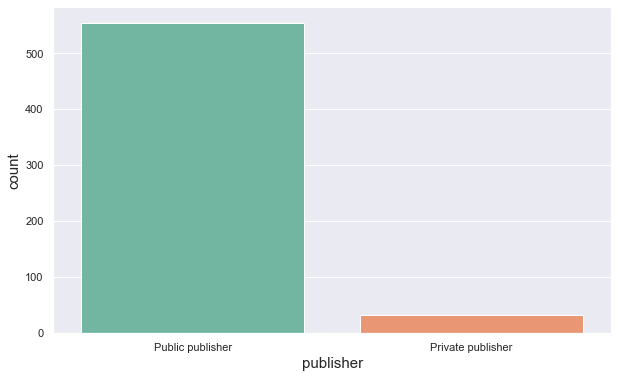

In [844]:
sns.countplot(x=PUBLISHER, data=df)
df[PUBLISHER].value_counts(dropna=False)

,price
publisher,
Private publisher,437863.636364
Public publisher,487163.577477


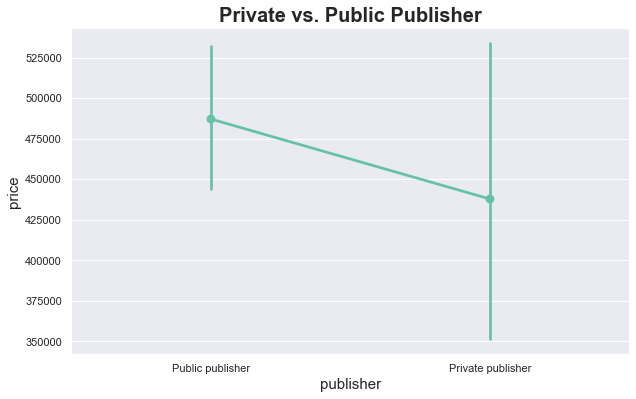

In [845]:
plot_target_relation(x=PUBLISHER, title="Private vs. Public Publisher", aggfunc=MEAN)

,price
publisher,
Private publisher,365000.0
Public publisher,355000.0


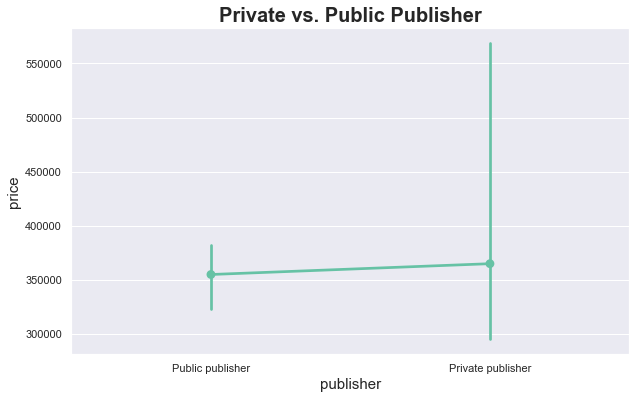

In [846]:
plot_target_relation(x=PUBLISHER, title="Private vs. Public Publisher", aggfunc=MEDIAN)

- => their is no significant pattern and the private publisher are not enough for a good comparison
- => drop this feature

In [847]:
df.drop(columns=[PUBLISHER], inplace=True)

## Rating Location

In [848]:
df[RATING_LOCATION] = (
    df[RATING_LOCATION]
        .astype("category")
        .cat.reorder_categories(
            ["Super", "Gut", "Okay", "Mäßig", "Wenig"]
        )
)

Gut      282
Okay     162
Super     72
Mäßig     65
Wenig      7
Name: rating_location, dtype: int64

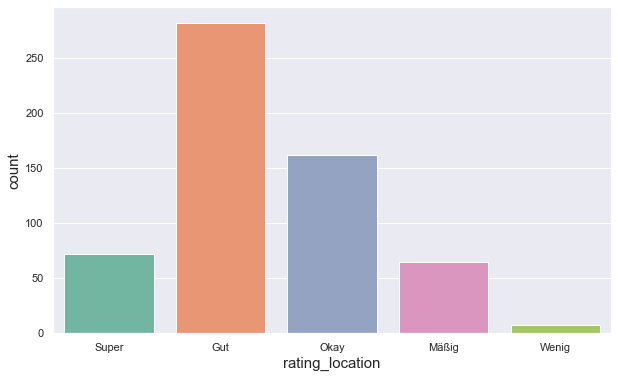

In [849]:
sns.countplot(x=RATING_LOCATION, data=df)
df[RATING_LOCATION].value_counts(dropna=False)

,price
rating_location,
Super,342232.263889
Gut,448659.097518
Okay,530183.962963
Mäßig,686544.461538
Wenig,449643.571429


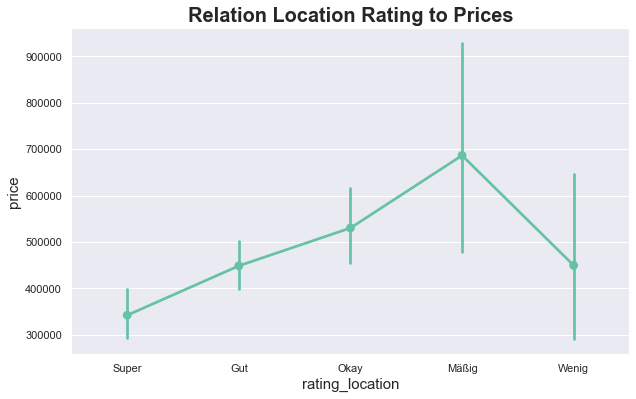

In [850]:
plot_target_relation(x=RATING_LOCATION, title="Relation Location Rating to Prices")

- thats interesting, because I would expect something else.

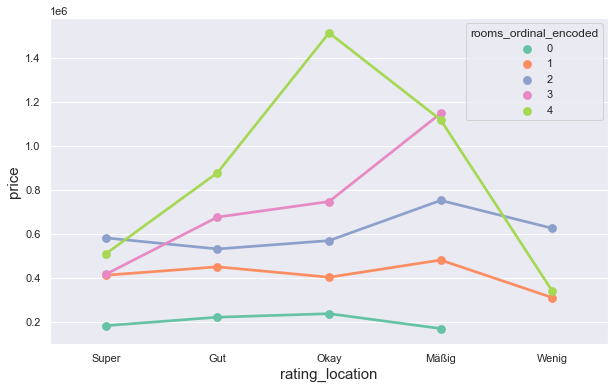

In [851]:
sns.pointplot(x=RATING_LOCATION, y=PRICE, hue=ROOMS_OE, data=df, ci=False);

- Okay. The pattern stays nearly the same by adding the rooms.
- It has an impact on the target, so we will use it
- OrdinalEncoding

## Rating Public Transport

In [852]:
df[RATING_PUBLIC_TRANSPORT] = (
    df[RATING_PUBLIC_TRANSPORT]
        .astype("category")
        .cat.reorder_categories(
            ["Super", "Gut", "Okay", "Mäßig", "Wenig"]
        )
)

Gut      162
Super    155
Okay     104
Mäßig     91
Wenig     76
Name: rating_public_transport, dtype: int64

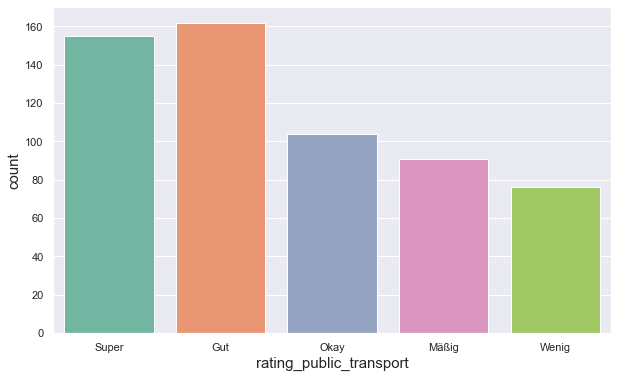

In [853]:
sns.countplot(x=RATING_PUBLIC_TRANSPORT, data=df)
df[RATING_PUBLIC_TRANSPORT].value_counts(dropna=False)

,price
rating_public_transport,
Super,656145.080645
Gut,515117.679012
Okay,369072.346154
Mäßig,347509.362637
Wenig,390353.394737


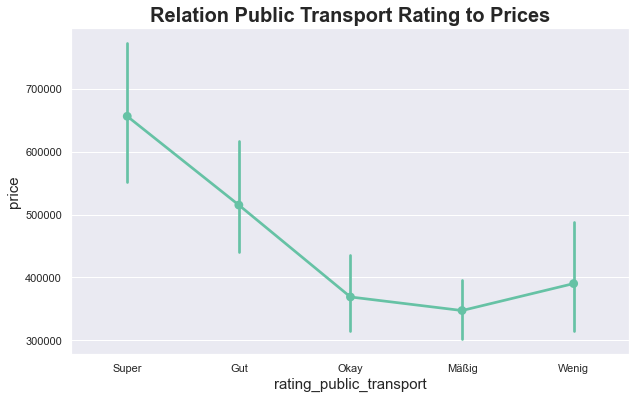

In [854]:
plot_target_relation(x=RATING_PUBLIC_TRANSPORT, title="Relation Public Transport Rating to Prices")

- => This Feature has an string impact on the target
- => OrdinalEncoding

## House Category

Not given           270
einfamilienhaus     120
mehrfamilienhaus     45
doppelhaushälfte     29
reihenmittelhaus     23
maisonette           20
apartment            20
penthouse            18
bungalow             13
reihenendhaus        10
terrassenwohnung      9
villa                 4
stadthaus             3
loft                  2
bauernhaus            2
Name: house_category, dtype: int64

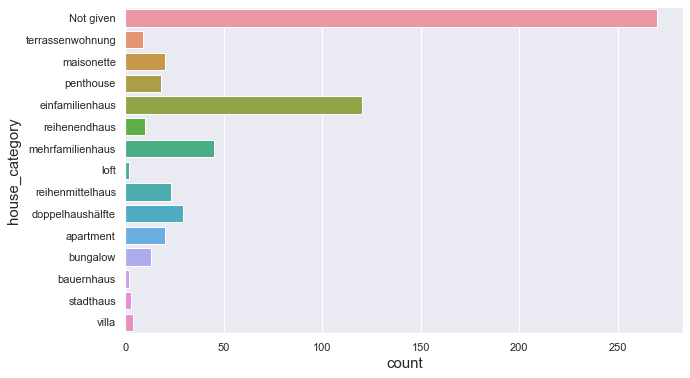

In [855]:
sns.countplot(y=HOUSE_CATEGORY, data=df)
df[HOUSE_CATEGORY].value_counts()

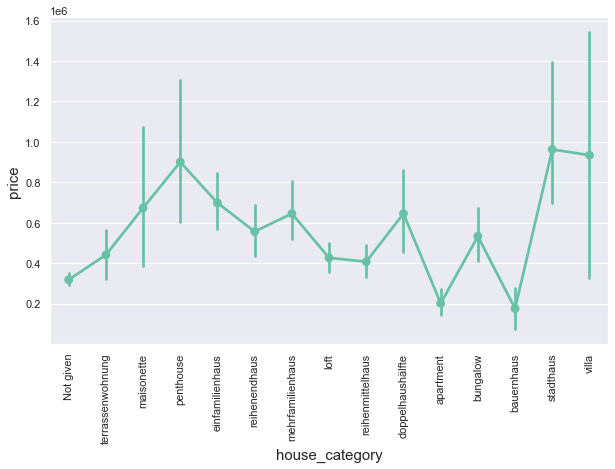

In [856]:
plot_target_relation(x=HOUSE_CATEGORY, title="", rotate=90, aggfunc=MEAN);

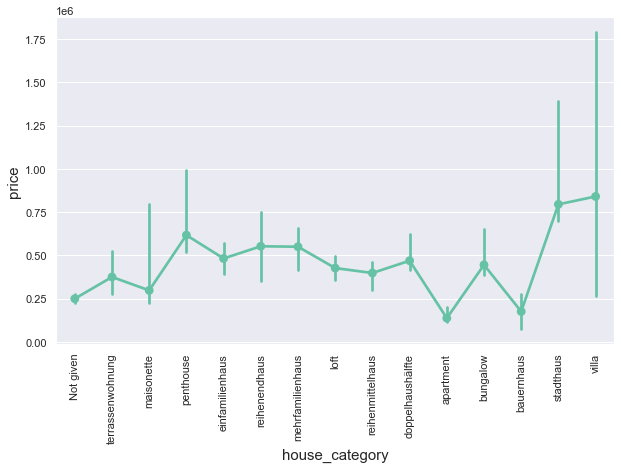

In [857]:
plot_target_relation(x=HOUSE_CATEGORY, title="", rotate=90, aggfunc=MEDIAN);

- This Feature has an significant impact in the target, when its given
- => OneHotEncoding, but delete not given!

## Housing Situation

In [858]:
# TODO: IMPLEMENT: plot_true_false_feature_report
# -> for a one-line-report of the feature

In [859]:
df.head()

,url,category,state,price,living_space,rooms,rating_location,rating_public_transport,house_category,housing_situation,...,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class,rooms_ordinal_encoded
0,https://www.immowelt.de/expose/28xsk53,Apartment,bl-baden-wuerttemberg,320000.0,87.00,3.5,Gut,Okay,Not given,Other,...,False,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,h,1
1,https://www.immowelt.de/expose/27egy5v,Apartment,bl-baden-wuerttemberg,449500.0,79.00,2.5,Gut,Super,Not given,Other,...,False,False,True,True,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,NaN,0
2,https://www.immowelt.de/expose/27dc45u,Apartment,bl-baden-wuerttemberg,465000.0,53.99,2.0,Gut,Gut,terrassenwohnung,Other,...,True,False,False,False,True,tiefgarage,gas,NaN,NaN,0
3,https://www.immowelt.de/expose/28b5m5a,Apartment,bl-baden-wuerttemberg,179000.0,58.35,2.0,Gut,Gut,Not given,Other,...,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,NaN,0
4,https://www.immowelt.de/expose/2zpe54x,Apartment,bl-baden-wuerttemberg,385000.0,NaN,4.0,Okay,Okay,Not given,attic,...,False,False,False,False,False,Keine Parkmöglichkeit,other,NaN,NaN,1


In [860]:
df.head()

,url,category,state,price,living_space,rooms,rating_location,rating_public_transport,house_category,housing_situation,...,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class,rooms_ordinal_encoded
0,https://www.immowelt.de/expose/28xsk53,Apartment,bl-baden-wuerttemberg,320000.0,87.00,3.5,Gut,Okay,Not given,Other,...,False,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,h,1
1,https://www.immowelt.de/expose/27egy5v,Apartment,bl-baden-wuerttemberg,449500.0,79.00,2.5,Gut,Super,Not given,Other,...,False,False,True,True,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,NaN,0
2,https://www.immowelt.de/expose/27dc45u,Apartment,bl-baden-wuerttemberg,465000.0,53.99,2.0,Gut,Gut,terrassenwohnung,Other,...,True,False,False,False,True,tiefgarage,gas,NaN,NaN,0
3,https://www.immowelt.de/expose/28b5m5a,Apartment,bl-baden-wuerttemberg,179000.0,58.35,2.0,Gut,Gut,Not given,Other,...,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,NaN,0
4,https://www.immowelt.de/expose/2zpe54x,Apartment,bl-baden-wuerttemberg,385000.0,NaN,4.0,Okay,Okay,Not given,attic,...,False,False,False,False,False,Keine Parkmöglichkeit,other,NaN,NaN,1


In [861]:
# korrelation matrix

In [862]:
# TODOS

# --AFTER EDA
# PUBLISHER => interpolate NAN, wenn signifikant für TARGET
# RATING_LOCATION => interpolate NAN, wenn signifikant für TARGET
# RATING_PUBLIC_TRANSPORT => interpolate NAN, wenn signifikant für TARGET
# HOUSE_YEAR => NAN to 0 and convert to int, wenn signifikant für TARGET
# ENERGY_CERTIFICATE_TYPE => interpolate NAN, wenn signifikant für TARGET
# ENERGY_EFFICIENT_CLASS => interpolate NAN, wenn signifikant für TARGET

# interpolate Livingspace! -> own model?
